In [1]:
import json
import pandas as pd
import numpy as np

In [2]:
json_data = json.load(open('./data/analysis_reaction.json'))

In [3]:
print(json.dumps(json_data[0], indent=4))

{
    "id": "846372277712191538",
    "content": "https://steamcommunity.com/sharedfiles/filedetails/?id=2495737205",
    "author": {
        "id": "211209226230431744",
        "username": "Phil",
        "discriminator": "9105",
        "public_flags": 128
    },
    "attachments": [
        {
            "id": "846372277830156308",
            "filename": "unknown.png",
            "size": 287362,
            "content_type": "image/png"
        }
    ],
    "embeds": [
        {
            "type": "article",
            "url": "https://steamcommunity.com/sharedfiles/filedetails/?id=2495737205",
            "title": "Steam Workshop::Alpi Frog"
        }
    ],
    "mentions": [],
    "edited_timestamp": null,
    "flags": 0,
    "reactions": null
}


In [37]:
df1 = pd.json_normalize(
    json_data, 
    record_path=['reactions'],
    meta=['id', 'content', ['author', 'id']]
)

df2 = pd.json_normalize(
    json_data, 
    record_path=['attachments'],
    record_prefix='attachments.',
    meta=['id'],
)

df = pd.merge(df1, df2, on=['id'])

In [5]:
df = pd.json_normalize(
    json_data, 
    record_path=['reactions'],
    meta=['id', 'content', ['author', 'id'],['attachments']]
)

#df = pd.merge(df2, df1, on=['id'])

In [16]:
df.columns

Index(['count', 'emoji.id', 'emoji.name', 'id', 'content', 'author.id',
       'attachments.id', 'attachments.filename', 'attachments.size',
       'attachments.content_type'],
      dtype='object')

In [17]:
df.head(5) #tail

,count,emoji.id,emoji.name,id,content,author.id,attachments.id,attachments.filename,attachments.size,attachments.content_type
0,12,None,🟥,846368511756599327,,433409140606369822,846368509864706078,20210524144336_1.jpg,273815,image/jpeg
1,4,None,😄,846361933074792479,no comment,228461639408680960,846361930654547989,unknown.png,150347,image/png
2,3,None,📈,846361933074792479,no comment,228461639408680960,846361930654547989,unknown.png,150347,image/png
3,6,None,👍,846359278221918228,,318763925334392842,846359274925850644,20210524144922_1.jpg,109340,image/jpeg
4,3,None,❤️,846352601783599125,"Out on the Workshop, check it out !\n\nhttps:/...",538013627496792084,846352602547093504,573090_20210524120949_1.png,1185668,image/png


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132579 entries, 0 to 132578
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   count                     132579 non-null  int64 
 1   emoji.id                  10533 non-null   object
 2   emoji.name                132579 non-null  object
 3   id                        132579 non-null  object
 4   content                   132579 non-null  object
 5   author.id                 132579 non-null  object
 6   attachments.id            132579 non-null  object
 7   attachments.filename      132579 non-null  object
 8   attachments.size          132579 non-null  int64 
 9   attachments.content_type  24058 non-null   object
dtypes: int64(2), object(8)
memory usage: 11.1+ MB


In [19]:
df.describe()

,count,attachments.size
count,132579.000000,1.325790e+05
mean,6.394135,1.737921e+06
std,6.303088,5.168430e+06
min,1.000000,6.800000e+01
25%,2.000000,1.769515e+05
50%,5.000000,5.796300e+05
75%,8.000000,1.453524e+06
max,140.000000,1.018831e+08


In [20]:
df.isna().sum() / df.shape[0]

count                       0.000000
emoji.id                    0.920553
emoji.name                  0.000000
id                          0.000000
content                     0.000000
author.id                   0.000000
attachments.id              0.000000
attachments.filename        0.000000
attachments.size            0.000000
attachments.content_type    0.818538
dtype: float64

In [21]:
df['emoji.name'].value_counts()

👍        24263
🇪         4406
🇴         4359
thonk     4310
👌         3983
         ...  
😸            1
🗄️           1
🇬🇳           1
👩‍🦲          1
🚟            1
Name: emoji.name, Length: 1422, dtype: int64

<AxesSubplot:ylabel='Frequency'>

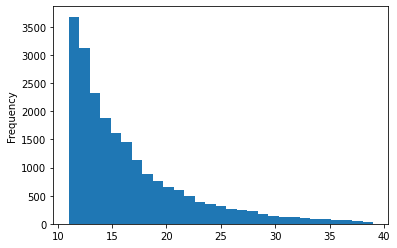

In [38]:
df = df.loc[df['count']>10]
df.loc[(df['count']>10) & (df['count']<40)]['count'].plot.hist(bins=29)

In [46]:
mask = (
    (df['count']>10) &
    (df['emoji.name'].isin(['👍','👍🏻','👌','💕','❤️','👀''😍','🤩','🤣','😂','😱','🤯','😮','🧠','💯','🆒','💥','🔥','thonk','doge']))
)
df1 = df.loc[mask]
dict(df1['emoji.name'].value_counts())

{'👍': 5361,
 'thonk': 732,
 '👌': 709,
 '❤️': 347,
 '💯': 175,
 '🆒': 144,
 '🔥': 131,
 '😂': 116,
 '😮': 97,
 '🤣': 87,
 '🤯': 69,
 'doge': 54,
 '😱': 45,
 '💥': 44,
 '👍🏻': 35,
 '🤩': 23,
 '🧠': 20,
 '💕': 10}

In [55]:
df1.loc[df1['id']]

,count,emoji.id,emoji.name,id,content,author.id,attachments.id,attachments.filename,attachments.size,attachments.content_type
12,11,None,👍,846322726573572136,,417710214897205249,846322723780034580,20210524114334_1.jpg,138329,image/jpeg
63,23,None,👍,846138766706999306,"had to build a new flight system, but it's sig...",204819021290405898,846138764526485565,20210523124240_1.jpg,242325,image/jpeg
77,42,None,❤️,846132354225012756,🤩,265575561617735683,846132352098107473,unknown.png,1482779,image/png
97,12,None,😱,846116868174643221,Man steals helicopter from local helicopter en...,290554978807054366,846116865846673428,unknown.png,2032048,image/png
111,11,None,👍,846103113152987196,by <@!509695438535000076>,413283162400227330,846103111030276116,ivN56AuK6j4.png,1142091,image/png
...,...,...,...,...,...,...,...,...,...,...
132533,15,None,😂,648111187510165505,,273001032982724608,648111181273235466,Base_Profile_Screenshot_2019.11.24_-_13.40.27....,1267161,None
132564,14,None,🆒,648031342461714443,New record on flat water.. *53 m/s!*,118030843141685255,648031334576422922,hydrobird3.gif,8040415,None
132565,12,None,👍,648031342461714443,New record on flat water.. *53 m/s!*,118030843141685255,648031334576422922,hydrobird3.gif,8040415,None
132567,20,400283242185490442,thonk,648020606205558790,,414416069617385472,648020598571794473,20191122000822_1.jpg,65422,None


In [56]:
dict(df1['emoji.name'].value_counts())

{'👍': 5361,
 'thonk': 732,
 '👌': 709,
 '❤️': 347,
 '💯': 175,
 '🆒': 144,
 '🔥': 131,
 '😂': 116,
 '😮': 97,
 '🤣': 87,
 '🤯': 69,
 'doge': 54,
 '😱': 45,
 '💥': 44,
 '👍🏻': 35,
 '🤩': 23,
 '🧠': 20,
 '💕': 10}

In [57]:
df1.loc[df1['emoji.name']=='👍'].tail()

,count,emoji.id,emoji.name,id,content,author.id,attachments.id,attachments.filename,attachments.size,attachments.content_type
132471,11,None,👍,648172265648947200,🔫,246695388944269312,648172259420143616,0lcxcYC2tkx6.png,511520,None
132491,13,None,👍,648141183167758367,👀,402159550939004928,648141175890378764,Bildschirmfoto_2019-11-24_um_13.37.37.png,2109594,None
132500,25,None,👍,648126079554289694,Speaking of roof windows.,295555944199356418,648126078719754243,20191124123907_1.jpg,399696,None
132531,12,None,👍,648111188177059840,,295555944199356418,648111187397050369,20191124114222_1.jpg,295728,None
132565,12,None,👍,648031342461714443,New record on flat water.. *53 m/s!*,118030843141685255,648031334576422922,hydrobird3.gif,8040415,None
